Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

In [2]:
#Load the data sets- train and test 
df = pd.read_csv('/home/vamshi/Downloads/train.csv')



In [3]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [7]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

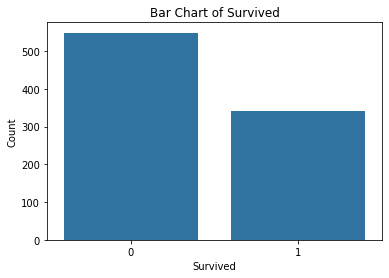

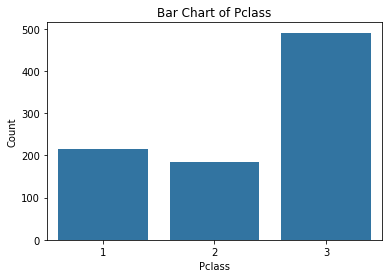

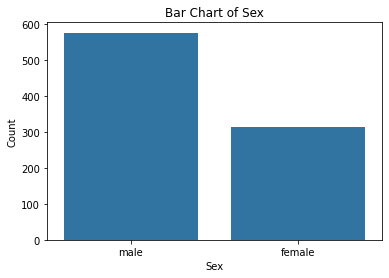

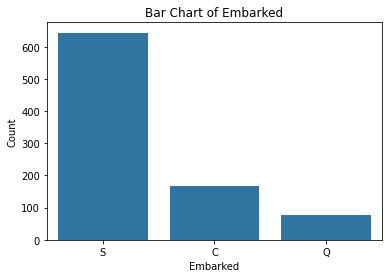

In [6]:
#Barchart of Survived, Pclass, Sex, Embarked
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    if col in df.columns:
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")

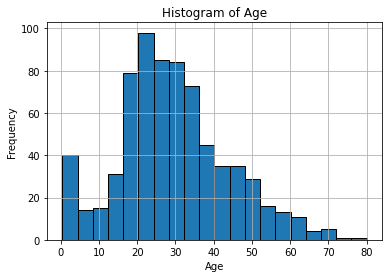

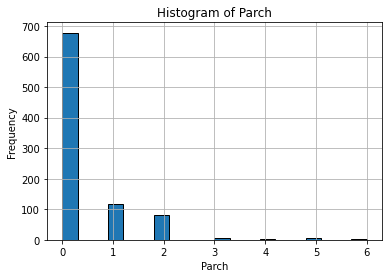

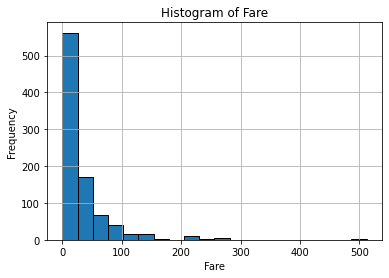

In [8]:
#Histogram of Age, Parch, Fare
numeric_cols = ['Age', 'Parch', 'Fare']

for col in numeric_cols:
    if col in df.columns:
        plt.hist(df[col].dropna(), bins=20, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")


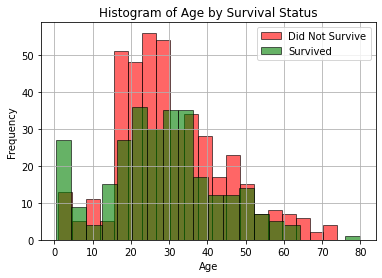

In [9]:
#Plot histogram of age for survived and did not survived class
if 'Survived' in df.columns and 'Age' in df.columns:
    # Plotting
    plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.6, label='Did Not Survive', color='red', edgecolor='black')
    plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.6, label='Survived', color='green', edgecolor='black')
    
    plt.title('Histogram of Age by Survival Status')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Columns 'Age' and/or 'Survived' not found in the dataset.")

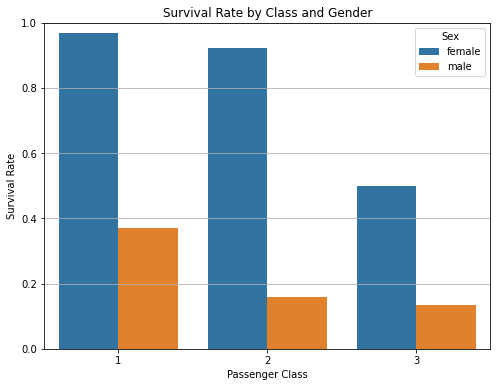

In [10]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
if {'Survived', 'Pclass', 'Sex'}.issubset(df.columns):
    # Group by Pclass and Sex, then compute survival rate
    grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

    # Plot survival rate
    plt.figure(figsize=(8,6))
    sns.barplot(data=grouped, x='Pclass', y='Survived', hue='Sex')
    plt.title('Survival Rate by Class and Gender')
    plt.ylabel('Survival Rate')
    plt.xlabel('Passenger Class')
    plt.ylim(0, 1)
    plt.grid(True, axis='y')
    plt.show()
else:
    print("Columns 'Survived', 'Pclass', or 'Sex' not found in dataset.")

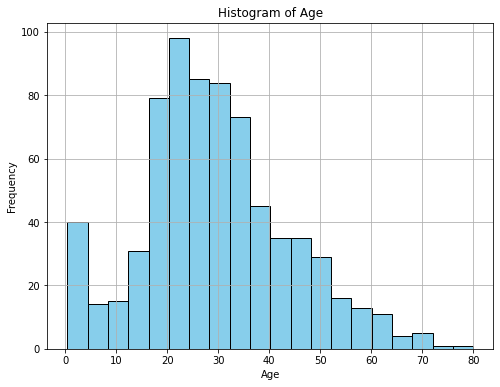

In [11]:
#Histogram of Age of the given data set(sample)
if 'Age' in df.columns:
    plt.figure(figsize=(8,6))
    plt.hist(df['Age'].dropna(), bins=20, edgecolor='black', color='skyblue')
    plt.title('Histogram of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("Column 'Age' not found in the dataset.")



## Handling Missing Values

In [12]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
#Impute the missing values in Fare column with median value
df['Fare'] = df['Fare'].fillna(np.mean)

In [14]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
mean_age = df['Age'].mean(skipna=True)
std_age = df['Age'].std(skipna=True)
#that has same mean and standard deviation as non missing Age data

df['Age'] = df['Age'].apply(lambda x: np.random.normal(mean_age, std_age) if np.isnan(x) else x)

## Feature Engineering - Creating new features

In [15]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize'] = df['Parch']+df['SibSp']+1

In [16]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone'] = df['FamilySize'].apply(lambda x: True if x==1 else False)

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [17]:
df['Has_cabin'] = df['Cabin'].apply(lambda x: False if x==np.nan else True)
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, PassengerId, Ticket, and Cabin
df.drop(['PassengerId', 'PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)


## Model Building

In [18]:
#Prepare X and y
y = df['Survived']
X = df.drop(columns='Survived')

In [19]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,3,male,22.000000,1,0,7.2500,S,2,False,True
1,1,female,38.000000,1,0,71.2833,C,2,False,True
2,3,female,26.000000,0,0,7.9250,S,1,True,True
3,1,female,35.000000,1,0,53.1000,S,2,False,True
4,3,male,35.000000,0,0,8.0500,S,1,True,True
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,1,True,True
887,1,female,19.000000,0,0,30.0000,S,1,True,True
888,3,female,16.444825,1,2,23.4500,S,4,False,True
889,1,male,26.000000,0,0,30.0000,C,1,True,True


In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
# Label encoding of categorical features
le = LabelEncoder()
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [22]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,3,1,22.000000,1,0,7.2500,2,2,0,0
1,1,0,38.000000,1,0,71.2833,0,2,0,0
2,3,0,26.000000,0,0,7.9250,2,1,1,0
3,1,0,35.000000,1,0,53.1000,2,2,0,0
4,3,1,35.000000,0,0,8.0500,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1,0
887,1,0,19.000000,0,0,30.0000,2,1,1,0
888,3,0,16.444825,1,2,23.4500,2,4,0,0
889,1,1,26.000000,0,0,30.0000,0,1,1,0


In [23]:
# concat df_categorical with original df


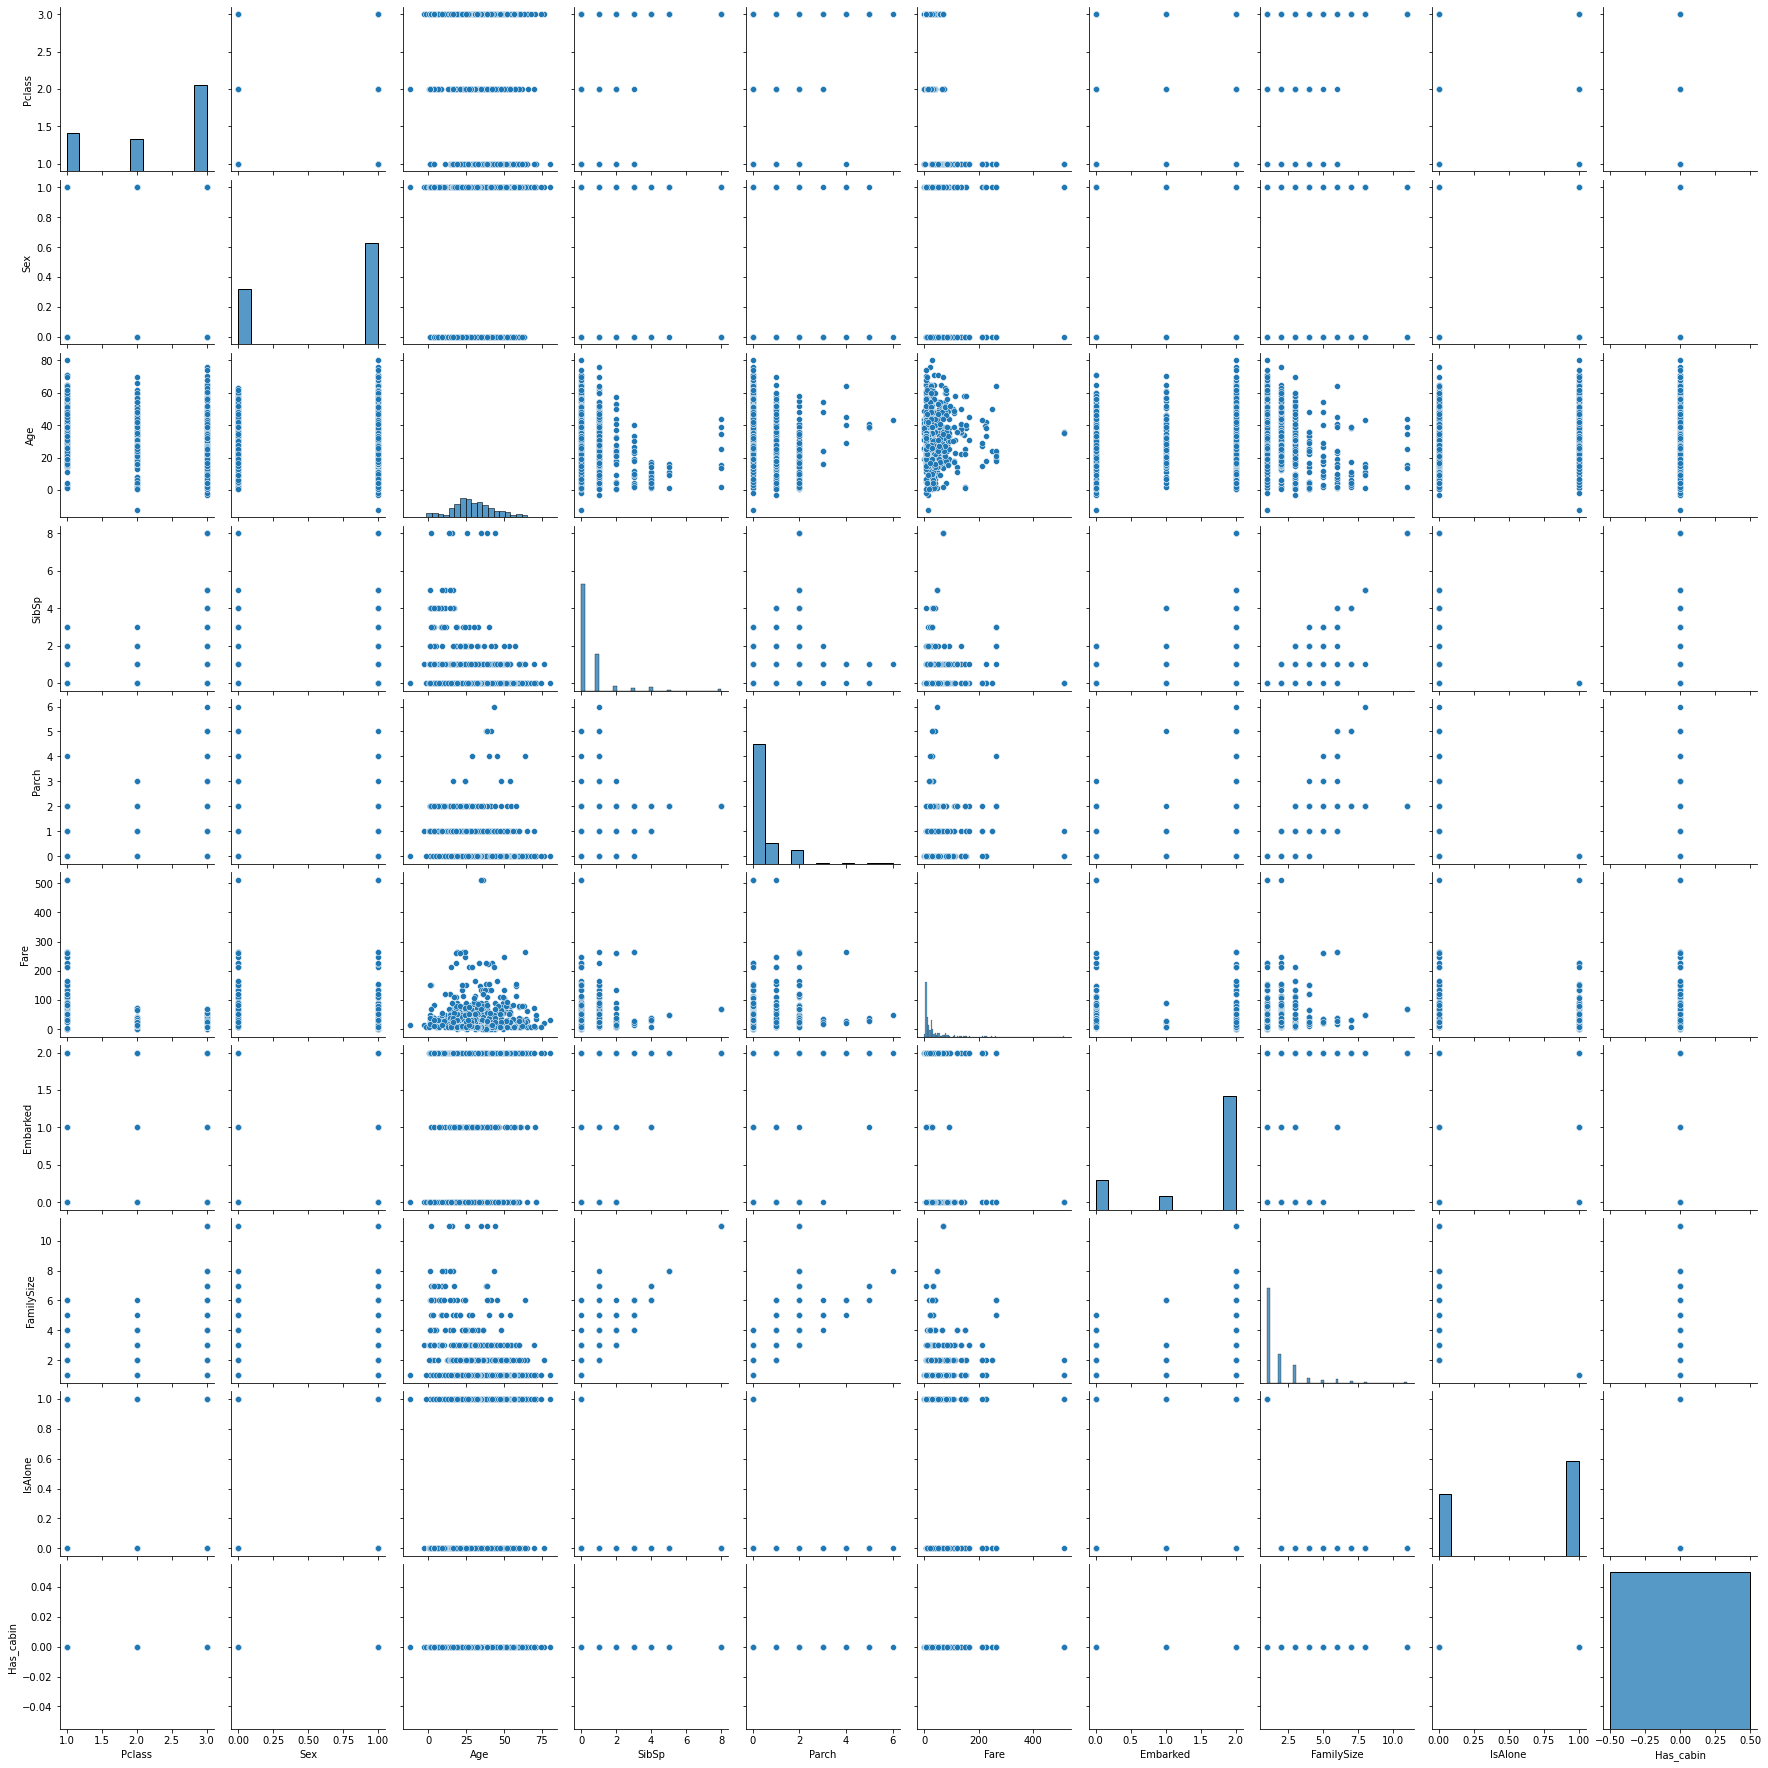

In [24]:
#Do a pairplot of all features
sns.pairplot(X)

In [25]:
# Splitting the data into train and validation set - 90% train 10% validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=2, test_size=0.1, stratify=y)


In [26]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
tree = DecisionTreeClassifier(random_state=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

[Text(0.3167660361842105, 0.96875, 'Sex <= 0.5\ngini = 0.473\nsamples = 801\nvalue = [494.0, 307.0]\nclass = Alive'),
 Text(0.13622291021671826, 0.90625, 'Pclass <= 2.5\ngini = 0.385\nsamples = 280\nvalue = [73, 207]\nclass = not Alive'),
 Text(0.2264944732004644, 0.9375, 'True  '),
 Text(0.03869969040247678, 0.84375, 'Age <= 2.5\ngini = 0.09\nsamples = 148\nvalue = [7, 141]\nclass = not Alive'),
 Text(0.018575851393188854, 0.78125, 'Pclass <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Alive'),
 Text(0.01238390092879257, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Alive'),
 Text(0.02476780185758514, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = not Alive'),
 Text(0.058823529411764705, 0.78125, 'Fare <= 22.0\ngini = 0.079\nsamples = 146\nvalue = [6, 140]\nclass = not Alive'),
 Text(0.03715170278637771, 0.71875, 'Age <= 56.0\ngini = 0.219\nsamples = 32\nvalue = [4, 28]\nclass = not Alive'),
 Text(0.030959752321981424, 0.65625, 'Fare <= 20.25\ngini =

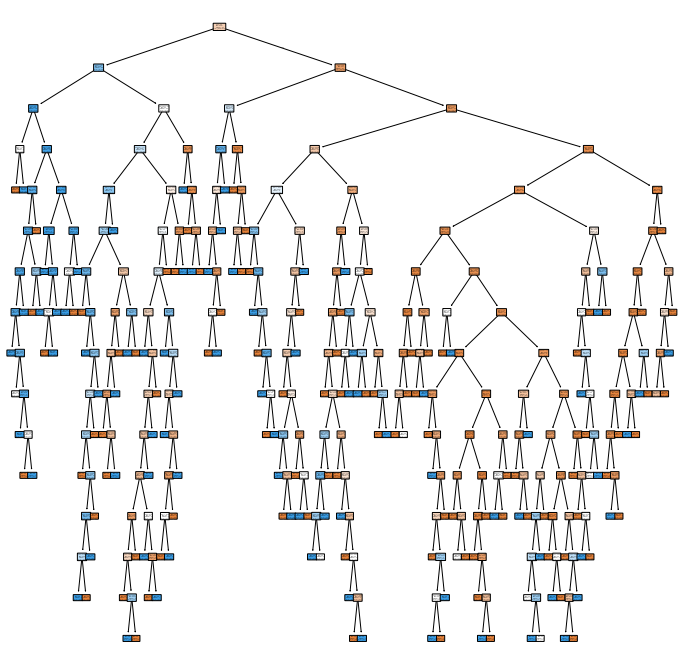

In [27]:
#Print the tree

# Importing required packages for visualization
plt.figure(figsize=(12, 12))
plot_tree(tree, feature_names=X.columns, class_names=['Alive', 'not Alive'], rounded=True, filled=True)


In [28]:
# plotting tree with max_depth=3
tree2 = DecisionTreeClassifier(random_state=2, max_depth=3)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

<img src="tree2.png">

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.473\nsamples = 801\nvalue = [494.0, 307.0]\nclass = Alive'),
 Text(0.25, 0.625, 'Pclass <= 2.5\ngini = 0.385\nsamples = 280\nvalue = [73, 207]\nclass = not Alive'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\ngini = 0.09\nsamples = 148\nvalue = [7, 141]\nclass = not Alive'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Alive'),
 Text(0.1875, 0.125, 'gini = 0.079\nsamples = 146\nvalue = [6, 140]\nclass = not Alive'),
 Text(0.375, 0.375, 'FamilySize <= 4.5\ngini = 0.5\nsamples = 132\nvalue = [66, 66]\nclass = Alive'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 108\nvalue = [45.0, 63.0]\nclass = not Alive'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]\nclass = Alive'),
 Text(0.75, 0.625, 'Age <= 13.0\ngini = 0.31\nsamples = 521\nvalue = [421, 100]\nclass = Alive'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 2.5\ngini = 0.494\nsamples = 45\nvalue = [20, 25]\nclass

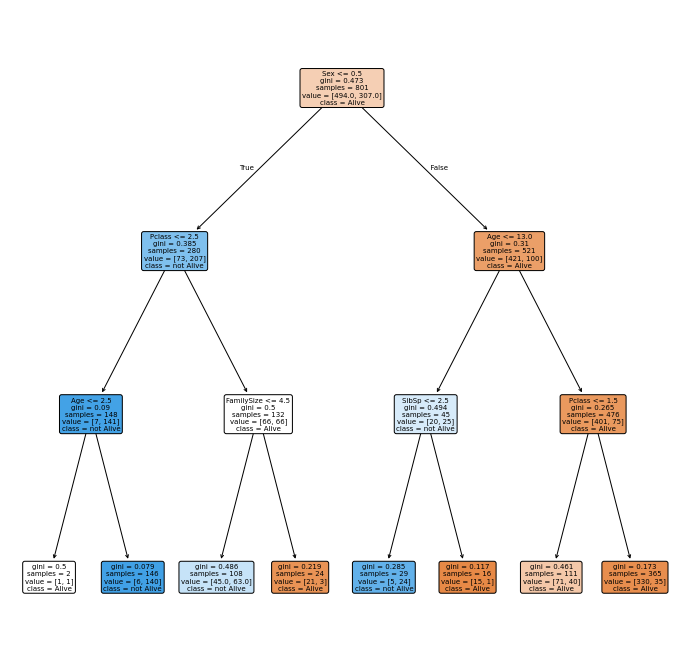

In [29]:
plt.figure(figsize=(12, 12))
plot_tree(tree2, feature_names=X.columns, class_names=['Alive', 'not Alive'], rounded=True, filled=True)

In [30]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report


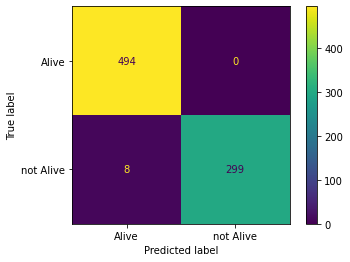

In [31]:
# Printing confusion matrix and accuracy
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train, display_labels=['Alive', 'not Alive'])

In [32]:
y_pred = tree2.predict(X_validation)


In [33]:
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='binary')
recall = recall_score(y_validation, y_pred, average='binary')
f1 = f1_score(y_validation, y_pred, average='binary')
conf_matrix = confusion_matrix(y_validation, y_pred)

In [34]:
print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1 : {f1}')
print(f'conf_matrix:{conf_matrix}')

accuracy : 0.8555555555555555
precision : 0.8235294117647058
recall : 0.8
f1 : 0.8115942028985508
conf_matrix:[[49  6]
 [ 7 28]]
